# 1. Data and module import

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
from prophet import Prophet

In [35]:
dataset = pd.read_csv('../timeseries-forecasting/salesdata_ger.csv')
dataset.head(5)

,OrderDate,QtyOrdered
0,2019-01-01,9279
1,2019-01-02,11073
2,2019-01-03,12272
3,2019-01-04,12617
4,2019-01-05,13354


In [36]:
# Convert data into format required by Prophet

dataset_train = dataset.query("OrderDate <= '2021-12-31'")
df = pd.DataFrame({'ds': pd.to_datetime(dataset_train['OrderDate']), 'y': dataset_train['QtyOrdered']})
df.tail(5)

,ds,y
1091,2021-12-27,31431
1092,2021-12-28,29659
1093,2021-12-29,28661
1094,2021-12-30,24712
1095,2021-12-31,15377


In [37]:
# Declare black_fridays df to input as parameter to the model

black_fridays = pd.DataFrame({'holiday': 'Black Friday',
                              'ds': pd.to_datetime(['2019-11-29', '2020-11-27', '2021-11-25', '2022-11-25']),
                              'lower_window': 0,
                              'upper_window': 2})

# Initialize and fit Prophet model with holidays parameter
prophet = Prophet(holidays=black_fridays,
                  yearly_seasonality=True,
                  weekly_seasonality=True,
                  daily_seasonality=False)
prophet.add_country_holidays(country_name='DE')
prophet.fit(df)

In [38]:
prophet.train_holiday_names

0                 Black Friday
1                      Neujahr
2                   Karfreitag
3                  Ostermontag
4                   Erster Mai
5          Christi Himmelfahrt
6                Pfingstmontag
7    Tag der Deutschen Einheit
8         Erster Weihnachtstag
9        Zweiter Weihnachtstag
dtype: object

In [39]:
# Declare future timeline

future = prophet.make_future_dataframe(periods=365, freq='D')
future.tail()

,ds
1456,2022-12-27
1457,2022-12-28
1458,2022-12-29
1459,2022-12-30
1460,2022-12-31


In [40]:
# Forecast. yhat - predicted value, yhat_upper - upper interval, yhat_lower - lower interval

forecast = prophet.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head()

,ds,yhat,yhat_lower,yhat_upper
0,2019-01-01,7629.440964,-212.984248,15862.830115
1,2019-01-02,6608.435468,-1149.772057,15265.110725
2,2019-01-03,6547.067619,-1155.349808,14249.098449
3,2019-01-04,6285.189932,-1589.825734,14076.236383
4,2019-01-05,8634.219895,-80.169534,16906.121010


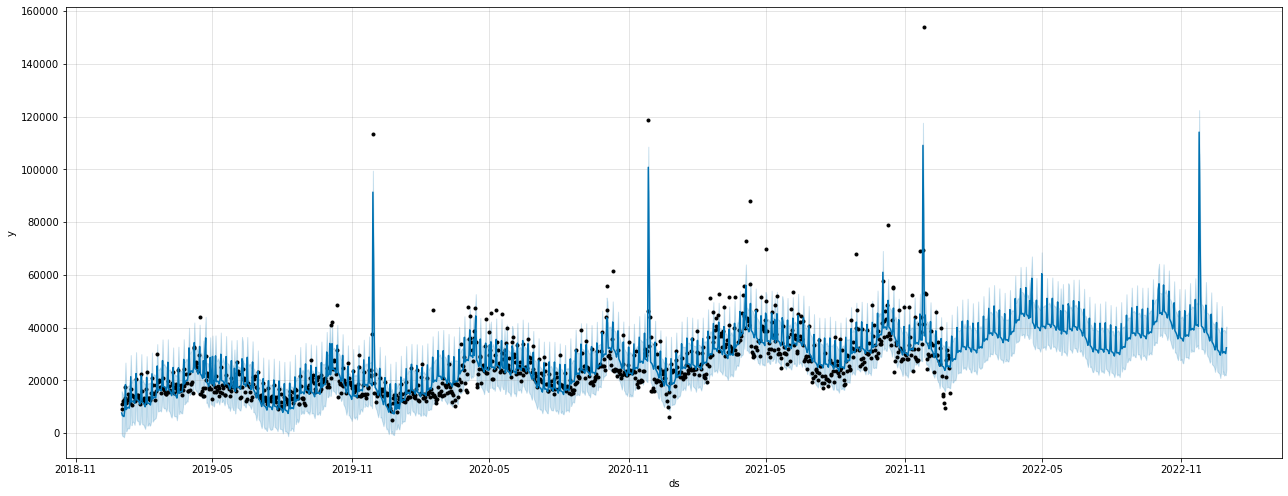

In [41]:
fig = prophet.plot(forecast, figsize=(18,7))

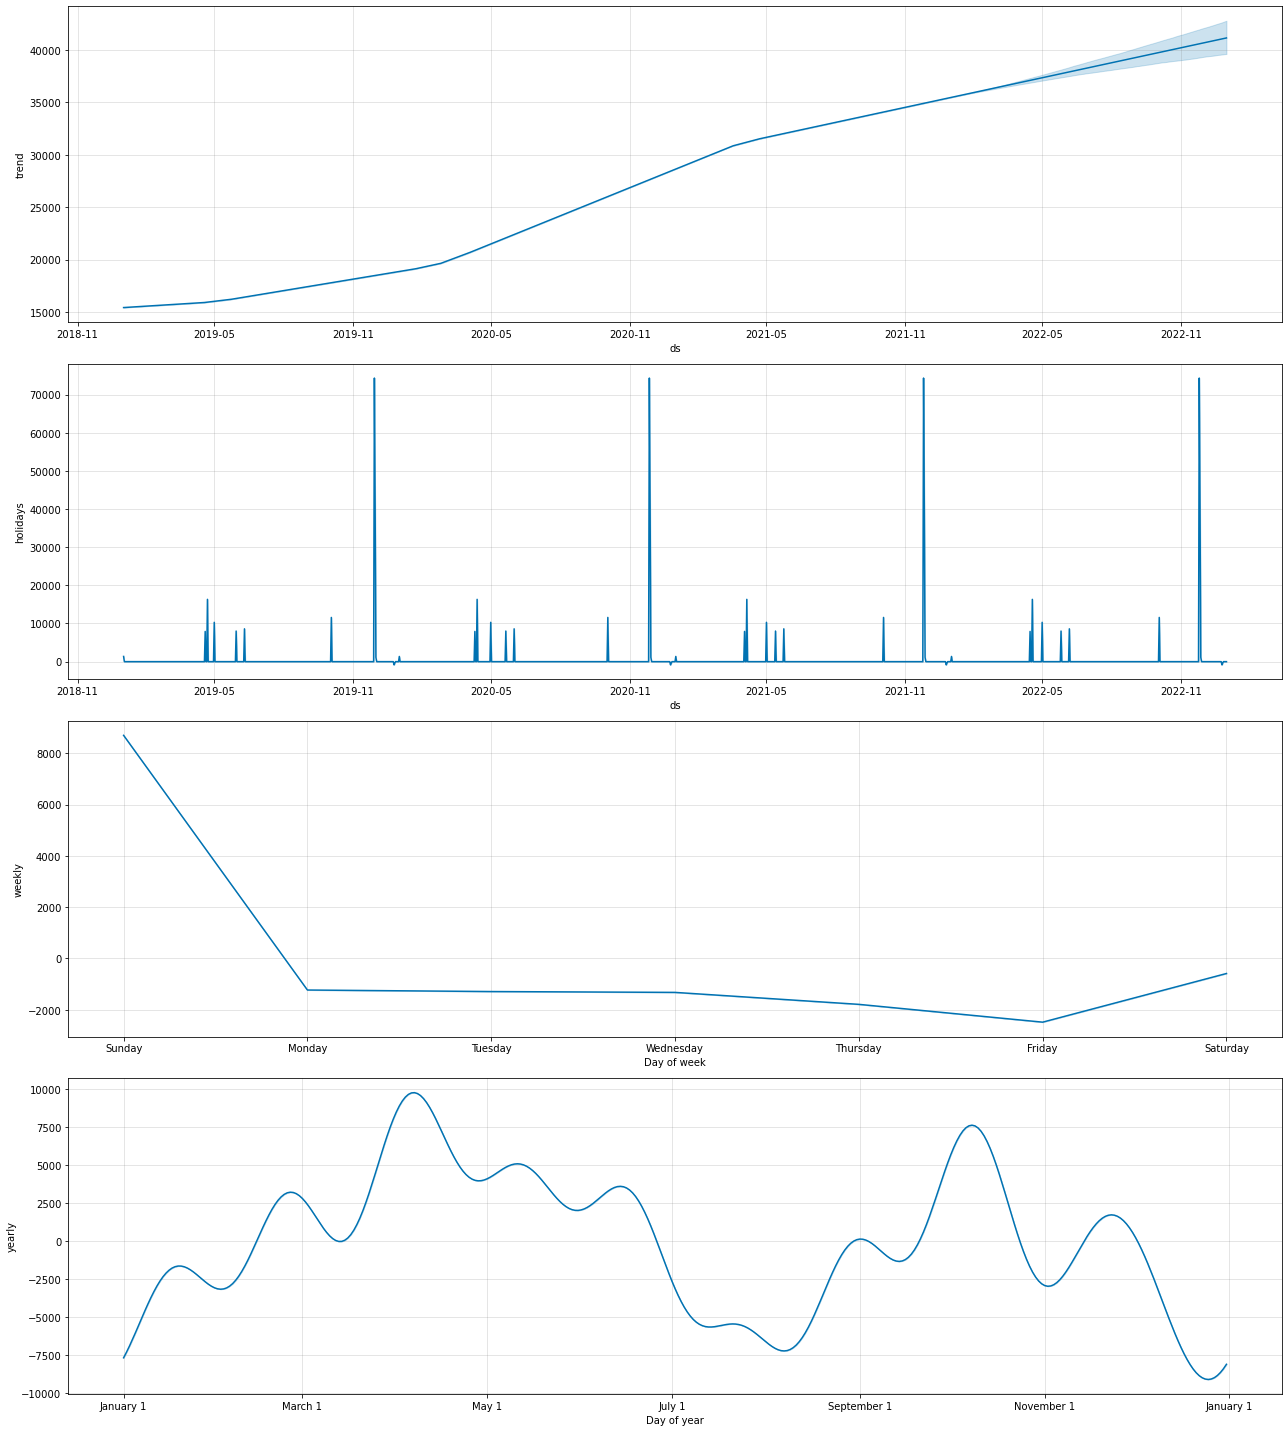

In [42]:
fig2 = prophet.plot_components(forecast, figsize=(18,20))